# Quatnum classification (Train OR data)

In [1]:
from quantum_classifier import *
from circuit_structure_effect_on_trainability import *

In this notebook, we see the dependence of trainability of the QML classifier on the circuit structure and the cost function.

The circuit structure is defined by two parts: the embedding part, the ansatz part.
- embedding part: the embedding circuit to encode input data into the quantum circuit.
    There are 3 types of embedding circuits:
    - Tensor Product Embedding (TPE): the embedding circuit is the tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Embedding (HEE): the embedding circuit is the tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Classically Hard Embedding (CHE): the embedding circuit that is hard to simulate on classically.
- ansatz part: the parametrized circuit to learn the training dataset.
    There are 3 types of ansatz circuits:
    - Tensor Product Ansatz (TPA): the ansatz circuit is the tensor product of rotation gates (Input data as angles).
    - Hardware Efficient Ansatz (HEA): the ansatz circuit is the tensor product of rotation gates (Input data as angles) followed by controlled-NOT gates over adjacent qubits.
    - Strongly Entangling Ansatz (SEA): the ansatz circuit that is strongly entangled.

On `HEE` and `CHE`, refer to [`Subtleties in the trainability of quantum machine learning models`](https://arxiv.org/abs/2110.14753) for more details.

On `SEA`, refer to PennyLnae page: [embedding and ansatz](https://pennylane.readthedocs.io/en/stable/introduction/templates.html)

In [2]:
# OR
x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([0, 1, 1, 1])
x_test, y_test = x_train, y_train

## Test

In [3]:
# settings
nqubits = 2; embedding_layers = 1; ansatz_nlayers = 2; embedding_type = 'TPE'; ansatz_type = 'SEA'; cost_type = 'LOG'

# optimize
test = QuantumClassifier(x_train, y_train, nqubits, embedding_layers, ansatz_nlayers, embedding_type, ansatz_type, cost_type, shots=None, stepsize=0.3, steps=200)

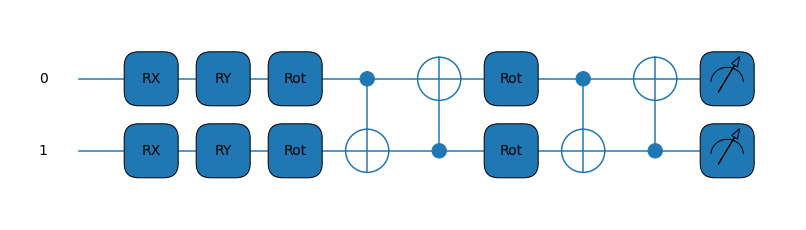

In [4]:
test.draw_circuit()

In [5]:
test.optimize()

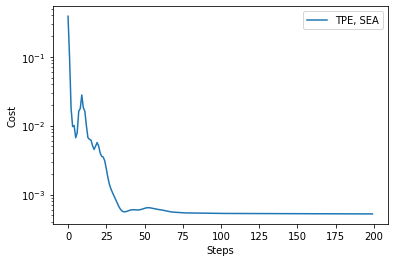

In [6]:
test.plot_cost()

In [7]:
print('accuracy ', test.accuracy(x_test, y_test))
print('optimized cost; ', test.cost_list[-1])

accuracy  1.0
optimized cost;  0.0005227864970808609


## Cost vs Circuit structure

In [20]:
nqubits = 2; embedding_nlayers = 1; ansatz_nlayers = 2; cost_type = 'LOG'
embedding_list = ['TPE', 'HEE', 'CHE', 'APE']
ansatz_list = ['TPA', 'HEA', 'SEA']
draw = False; shots = None; stepsize = 0.3; steps = 300

optimized_cost_acc_log, cost_all_log = train_each_circuit(x_train, y_train, x_test, y_test, nqubits, embedding_nlayers, ansatz_nlayers, embedding_list, ansatz_list, cost_type, draw, shots, stepsize, steps)

TPE, TPA
TPE, HEA
TPE, SEA
HEE, TPA
HEE, HEA
HEE, SEA
CHE, TPA
CHE, HEA
CHE, SEA
APE, TPA
APE, HEA
APE, SEA


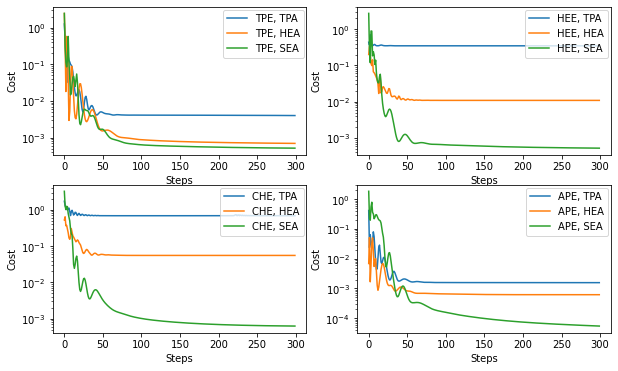

In [21]:
plot_cost(cost_all_log)

`TPE` and `APE` seems stably train the parameters.

Authors say:
>  Here we point out another subtlety, namely, that “classically-hard-to-simulate” and
“practical usefulness”, do not always coincide. Particularly, we here show that the CHE scheme can lead to poor performance for some standard benchmarking test.

in [`Subtleties in the trainability of quantum machine learning models`](https://arxiv.org/abs/2110.14753)

In [22]:
sort_cost_acc(cost_type, optimized_cost_acc_log)

LOG
embedding_type: APE, ansatz_type: SEA: cost 5.4470795455891984e-05
embedding_type: TPE, ansatz_type: SEA: cost 0.0005146485598148245
embedding_type: HEE, ansatz_type: SEA: cost 0.0005254196167312988
embedding_type: APE, ansatz_type: HEA: cost 0.0006181630605300977
embedding_type: CHE, ansatz_type: SEA: cost 0.0006234346320104021
embedding_type: TPE, ansatz_type: HEA: cost 0.0006944295983643338
embedding_type: APE, ansatz_type: TPA: cost 0.0015715993713403369
embedding_type: TPE, ansatz_type: TPA: cost 0.00399248988539958
embedding_type: HEE, ansatz_type: HEA: cost 0.010882304367522567
embedding_type: CHE, ansatz_type: HEA: cost 0.0552286208947618
embedding_type: HEE, ansatz_type: TPA: cost 0.3472810569162601
embedding_type: CHE, ansatz_type: TPA: cost 0.6867835699374487
---------------------------------------------------------------
embedding_type: TPE, ansatz_type: TPA: accuracy 1.0
embedding_type: TPE, ansatz_type: HEA: accuracy 1.0
embedding_type: TPE, ansatz_type: SEA: accuracy